# Keras モデルを作る．

In [ ]:
#31
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
import datetime

from tensorflow.keras.callbacks import EarlyStopping

#for tentsorboard
import tensorflow.keras.callbacks
#import tensorflow.keras.backend.tensorflow_backend as KTF
import tensorflow.keras.backend as KTF

from tensorflow.keras.models import load_model

#Vurnum = 実験番号
Vernum = 99

import os

In [4]:
#1
import re
import numpy as np
import glob
import random
import matplotlib.pyplot as plt

import pandas as pd
from urllib.request import urlopen
from lxml import etree

In [6]:
#loding ndarray
print(type(np.load('./saving_ndarray/x_train/all/x_train_all.npy')))
print(np.load('./saving_ndarray/x_train/all/x_train_all.npy'))

x_train_all = np.load('./saving_ndarray/x_train/all/x_train_all.npy')
y_train_all = np.load('./saving_ndarray/x_train/all/y_train_all.npy')
x_train_all_5crossval = np.load('./saving_ndarray/x_train/all/x_train_all_ 5crossval.npy')
y_train_all_5crossval = np.load('./saving_ndarray/x_train/all/y_train_all_5crossval.npy')
#x_train_positive_all_5crossval.npy
x_train_positive_all_5crossval = np.load('./saving_ndarray/x_train/all/x_train_positive_all_ 5crossval.npy') 
x_train_negative_all_5crossval = np.load('./saving_ndarray/x_train/all/x_train_negative_all_5crossval.npy')

<class 'numpy.ndarray'>
[[[[ 0.000000e+00]
   [-7.358760e-02]
   [ 0.000000e+00]
   ...
   [-1.995000e-04]
   [ 5.935090e-02]
   [ 0.000000e+00]]

  [[-3.838254e-01]
   [-2.554557e-01]
   [-8.600770e-02]
   ...
   [ 5.738126e-01]
   [-7.869063e-01]
   [ 7.227214e-01]]

  [[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   ...
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  ...

  [[ 1.000000e+00]
   [ 1.000000e+00]
   [ 1.000000e+00]
   ...
   [ 1.000000e+00]
   [ 3.000000e+00]
   [ 1.000000e+00]]

  [[ 3.000000e+00]
   [ 2.000000e+00]
   [ 2.000000e+00]
   ...
   [ 3.000000e+00]
   [ 2.000000e+00]
   [ 2.000000e+00]]

  [[ 0.000000e+00]
   [ 1.000000e+00]
   [ 0.000000e+00]
   ...
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 1.000000e+00]]]


 [[[ 0.000000e+00]
   [-9.987427e-01]
   [ 0.000000e+00]
   ...
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 0.000000e+00]
   [-7.458280e-01]
   [ 7.227214e-01]
   ...
   [ 1.630295e-01]
   [-2.554557e-01]
   [

In [3]:
#a = sum(x_train_all[0])
#print(a)

In [4]:
print(x_train_all[0])

[[[ 0.000000e+00]
  [-7.358760e-02]
  [ 0.000000e+00]
  [ 9.999950e-01]
  [ 0.000000e+00]
  [-1.995000e-04]
  [ 5.935090e-02]
  [ 0.000000e+00]]

 [[-3.838254e-01]
  [-2.554557e-01]
  [-8.600770e-02]
  [-7.021823e-01]
  [ 1.630295e-01]
  [ 5.738126e-01]
  [-7.869063e-01]
  [ 7.227214e-01]]

 [[ 0.000000e+00]
  [ 0.000000e+00]
  [ 0.000000e+00]
  [ 0.000000e+00]
  [ 0.000000e+00]
  [ 0.000000e+00]
  [ 0.000000e+00]
  [ 0.000000e+00]]

 [[ 0.000000e+00]
  [ 0.000000e+00]
  [ 0.000000e+00]
  [ 0.000000e+00]
  [ 0.000000e+00]
  [ 0.000000e+00]
  [ 0.000000e+00]
  [ 0.000000e+00]]

 [[ 1.191200e+02]
  [ 1.211600e+02]
  [ 1.151300e+02]
  [ 1.742000e+02]
  [ 8.910000e+01]
  [ 1.811900e+02]
  [ 1.551600e+02]
  [ 1.492100e+02]]

 [[ 1.011100e+02]
  [ 1.031500e+02]
  [ 9.712000e+01]
  [ 1.561900e+02]
  [ 7.108000e+01]
  [ 1.631800e+02]
  [ 1.371400e+02]
  [ 1.312000e+02]]

 [[ 2.090000e+00]
  [ 1.960000e+00]
  [ 1.990000e+00]
  [ 2.170000e+00]
  [ 2.340000e+00]
  [ 2.200000e+00]
  [ 1.820000e+00

In [23]:
total = 0
subs_dic = {}
for i in range(14):
    for j in range(8):
        total = total + x_train_all[0][i][j][0]
        subs_dic[0] = total

In [24]:
print(total)

2361.440744900001


In [26]:
print(subs_dic[0])

2361.440744900001


In [27]:
print(subs_dic)

{0: 2361.440744900001}


In [11]:
print(a.shape)

(8, 1)


## CNN version01(check_point: EarlyStopping)
https://qiita.com/kenichiro-yamato/items/60affeb7ca9f67c87a17

https://www.self-study-blog.com/dokugaku/python-pandas-dataframe-make/<br>
https://note.nkmk.me/python-pandas-assign-append/<br>

In [22]:
#訓練データ
x_train = x_train_all
y_train = y_train_all

#検証データ
x_val = x_train_all_5crossval 
y_val = y_train_all_5crossval 


#old_session = KTF.get_session()
#session = tf.Session('')
#KTF.set_session(session)
#KTF.set_learning_phase(1)

#modelの定義の前に重みのリセットが必要で，これ？
tf.compat.v1.Session()
#sess = tf.compat.v1.Session()

#モデル構築
model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(14, 4), strides=(1, 1), padding='valid', 
                 data_format="channels_last", dilation_rate=(1, 1), activation='relu', 
                 use_bias=True, input_shape=(14, 8, 1), kernel_initializer='glorot_uniform', 
                 bias_initializer='zeros',  name='Conv2D_01'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None, 
#                       name='MaxPooling2D_01'))
model.add(Flatten(name='Flatten_01'))
#model.add(Dropout(0.50))
#model.add(Dense(units=10, name='Denese_02', activation='relu'))
#model.add(Dense(units=50, name='Dense_01', activation='relu')
#model.add(Dense(units=10, name='Denese_03', activation='relu'))
model.add(Dense(units=2, name='Dense_out'))
model.add(Activation('softmax'))

#モデルの構造を表示
model.summary()

#訓練（学習）プロセスの設定
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])



#バリデーションロスが減少した場合に，各エポック終了後，モデルの重みを保存します
#checkpointer = ModelCheckpoint(filepath='./weights.hdf5', verbose=0, save_best_only=True, save_format="h5")
### add for TensorBoard
erly_stpg = EarlyStopping(patience=10, verbose=1,monitor='val_loss' , mode = 'min') 
chkfile = '../callbacks/' + '{0:2d}'.format(Vernum)+'_{epoch:02d}-{val_loss:.4f}.hdf5' #format関数
check_point = ModelCheckpoint(filepath = chkfile, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
check_point = [check_point]

log_dir = "log/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
cbks=[tensorboard_callback]

#訓練の実行 
NUM_EPOCHS=100
NUM_BATCH=32
#history = model.fit(x_train, y_train, batch_size=NUM_BATCH, epochs=NUM_EPOCHS, validation_split=0.2, shuffle = True ,
#                    callbacks=[erly_stpg , chck_pont], verbose = 0, )
history = model.fit(x_train, y_train, batch_size=NUM_BATCH, epochs=NUM_EPOCHS, 
                    shuffle = True, verbose = 0,
                    callbacks=check_point,
                   validation_data=(x_val, y_val))

print(type(history))
print(type(history.history))
print(history.history.keys())
print(history.history['loss'])
print(history.history['acc'])
print(history.history['val_loss'])
print(history.history['val_acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_01 (Conv2D)           (None, 1, 5, 3)           171       
_________________________________________________________________
Flatten_01 (Flatten)         (None, 15)                0         
_________________________________________________________________
Dense_out (Dense)            (None, 2)                 32        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.69283, saving model to ../callbacks/99_01-0.6928.hdf5

Epoch 00002: val_loss improved from 0.69283 to 0.69275, saving model to ../callbacks/99_02-0.6928.hdf5

Epoch 00003: val_loss improved from 0.69275 to 0.


Epoch 00096: val_loss did not improve from 0.69188

Epoch 00097: val_loss did not improve from 0.69188

Epoch 00098: val_loss improved from 0.69188 to 0.69188, saving model to ../callbacks/99_98-0.6919.hdf5

Epoch 00099: val_loss improved from 0.69188 to 0.69188, saving model to ../callbacks/99_99-0.6919.hdf5

Epoch 00100: val_loss improved from 0.69188 to 0.69188, saving model to ../callbacks/99_100-0.6919.hdf5
<class 'tensorflow.python.keras.callbacks.History'>
<class 'dict'>
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
[2.9667259400199266, 0.6928921484796783, 0.6929115564665208, 0.6928085028561132, 0.6927433373048102, 0.6927713588209182, 0.6927015072539778, 0.6926553268161858, 0.6926493979402897, 0.692585929523131, 0.6925861162342107, 0.6925564355654671, 0.692567708740475, 0.6925500127419312, 0.6926007596100167, 0.6925145887802076, 0.6925149719797851, 0.6924877640576769, 0.6925069029774952, 0.6924703485958208, 0.6924615667821481, 0.6924650956779624, 0.6924471618249213, 0.69240

In [23]:
'''
from tensorflow.python.keras.backend import set_session
from tensorflow.python.keras.models import load_model

tf_config = some_custom_config
sess = tf.Session(config=tf_config)
graph = tf.get_default_graph()

# IMPORTANT: models have to be loaded AFTER SETTING THE SESSION for keras! 
# Otherwise, their weights will be unavailable in the threads after the session there has been set
set_session(sess)
#model = load_model(...)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-23-bc3909e148dc>, line 12)

## csvファイルにモデルの学習評価を書き出す．

In [24]:
df1 = pd.DataFrame(
    data={'loss':history.history['loss'], 
          'acc':history.history['acc'],
          'val_loss':history.history['val_loss'], 
          'val_acc':history.history['val_acc']
         }, 
    index=np.arange(0, 100)
)
 
df1

,loss,acc,val_loss,val_acc
0,2.966726,0.492114,0.692827,0.525641
1,0.692892,0.520505,0.692754,0.525641
2,0.692912,0.520505,0.692685,0.525641
3,0.692809,0.520505,0.692629,0.525641
4,0.692743,0.520505,0.692570,0.525641
...,...,...,...,...
95,0.692363,0.520505,0.691885,0.525641
96,0.692505,0.520505,0.691886,0.525641
97,0.692382,0.520505,0.691884,0.525641
98,0.692397,0.520505,0.691883,0.525641


In [25]:
i=4
j=3
k=0
m=32
n=100

df2 = pd.DataFrame(
    data={'Kernel':f'14x{i}',
         'Conv2D':str(j),
         'hidden01':str(k),
         'Batch_size':str(m),
         'epochs':str(n)}, 
    index=np.arange(4)
)
df2

,Kernel,Conv2D,hidden01,Batch_size,epochs
0,14x4,3,0,32,100
1,14x4,3,0,32,100
2,14x4,3,0,32,100
3,14x4,3,0,32,100


In [26]:
print(pd.concat([df1, df2], axis=1))
df3 = pd.concat([df1, df2], axis=1)

        loss       acc  val_loss   val_acc Kernel Conv2D hidden01 Batch_size  \
0   2.966726  0.492114  0.692827  0.525641   14x4      3        0         32   
1   0.692892  0.520505  0.692754  0.525641   14x4      3        0         32   
2   0.692912  0.520505  0.692685  0.525641   14x4      3        0         32   
3   0.692809  0.520505  0.692629  0.525641   14x4      3        0         32   
4   0.692743  0.520505  0.692570  0.525641    NaN    NaN      NaN        NaN   
..       ...       ...       ...       ...    ...    ...      ...        ...   
95  0.692363  0.520505  0.691885  0.525641    NaN    NaN      NaN        NaN   
96  0.692505  0.520505  0.691886  0.525641    NaN    NaN      NaN        NaN   
97  0.692382  0.520505  0.691884  0.525641    NaN    NaN      NaN        NaN   
98  0.692397  0.520505  0.691883  0.525641    NaN    NaN      NaN        NaN   
99  0.692390  0.520505  0.691882  0.525641    NaN    NaN      NaN        NaN   

   epochs  
0     100  
1     100  
2  

In [27]:
var = "CNN_04"
filename = f'./fitting_model/FCvsCNN/CNN/trial_{var}.csv'
df3.to_csv(filename)

In [28]:
df3.iloc[0:5, :]

,loss,acc,val_loss,val_acc,Kernel,Conv2D,hidden01,Batch_size,epochs
0,2.966726,0.492114,0.692827,0.525641,14x4,3,0,32,100
1,0.692892,0.520505,0.692754,0.525641,14x4,3,0,32,100
2,0.692912,0.520505,0.692685,0.525641,14x4,3,0,32,100
3,0.692809,0.520505,0.692629,0.525641,14x4,3,0,32,100
4,0.692743,0.520505,0.692570,0.525641,NaN,NaN,NaN,NaN,NaN


In [29]:
df3.iloc[100-5:100, :]

,loss,acc,val_loss,val_acc,Kernel,Conv2D,hidden01,Batch_size,epochs
95,0.692363,0.520505,0.691885,0.525641,NaN,NaN,NaN,NaN,NaN
96,0.692505,0.520505,0.691886,0.525641,NaN,NaN,NaN,NaN,NaN
97,0.692382,0.520505,0.691884,0.525641,NaN,NaN,NaN,NaN,NaN
98,0.692397,0.520505,0.691883,0.525641,NaN,NaN,NaN,NaN,NaN
99,0.692390,0.520505,0.691882,0.525641,NaN,NaN,NaN,NaN,NaN


## 結果をプロットする．

In [13]:
'''
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-13-8c1ad1582a52>, line 3)

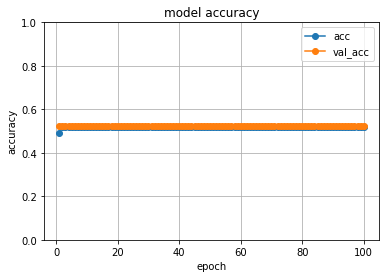

In [30]:
plt.plot(range(1, NUM_EPOCHS+1), df3['acc'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), df3['val_acc'], "-o")
plt.title('model accuracy')
plt.ylabel('accuracy')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './predict/img/CNN_learning_rate_acc_01.png'

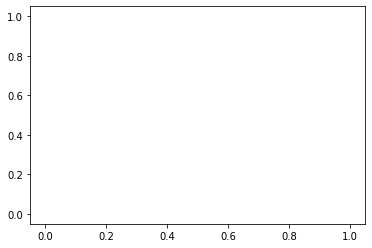

In [15]:
plt.figure()
plt.plot()
plt.savefig('./predict/img/CNN_learning_rate_acc_01.png')
plt.close('all')

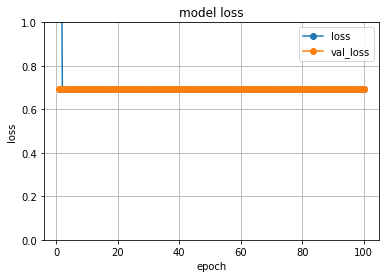

In [31]:
plt.plot(range(1, NUM_EPOCHS+1), df3['loss'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), df3['val_loss'], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

In [ ]:
plt.figure()
plt.plot()
plt.savefig('./predict/img/CNN_learning_rate_loss_01.png')
plt.close('all')

In [32]:
#old_session = KTF.get_session()

#session = tf.Session('')
#KTF.set_session(session)
#KTF.set_learning_phase(1)


loss, acc = model.evaluate(x_val, y_val)
print(f"Test Loss: {loss*100}%")
print(f"Test Acc: {acc*100}%")

### add for TensorBoard
#KTF.set_session(old_session)

78/78 [==============================] - 0s 24us/sample - loss: 0.6919 - acc: 0.5256
Test Loss: 69.1881957726601%
Test Acc: 52.56410241127014%


In [33]:
#predict_list = model.predict(x_train_positive_all_5crossval)

In [75]:
#print(predict_list)

In [24]:
x_train_positive_all_5crossval = np.load('./saving_ndarray/x_train/x_train_positive_all_ 5crossval.npy')

In [27]:
x_train_negative_all_5crossval = np.load('./saving_ndarray/x_train/x_train_negative_all_5crossval.npy')

In [10]:
predict_positive_list = model.predict(x_train_positive_all_5crossval)

In [11]:
len(predict_positive_list)

41

In [12]:
predict_negative_list = model.predict(x_train_negative_all_5crossval)

In [13]:
len(predict_negative_list)

38

In [14]:
predict_positive_list

array([[0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [

In [15]:
predict_negative_list

array([[0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [0.5206323, 0.4793677],
       [

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_true = [0, 0, 0, 0, 1, 1, 1, 1]
y_score = [0.2, 0.3, 0.6, 0.8, 0.4, 0.5, 0.7, 0.9]

y_true01 = []
y_score01 = []
for i in range(len(predict_positive_list)):
    y_true01.append(predict_positive_list[i][0])
    y_score01.append(1)
for i  in range(len(predict_negative_list)):
    y_true01.append(predict_negative_list[i][0])
    y_score01.append(0)
        
y_true01 = list(y_true01)
y_score01 = list(y_score01)

#roc = roc_curve(y_true01, y_score01)

#print(type(roc))
# <class 'tuple'>

#print(len(roc))
# 3

In [134]:
fpr, tpr, thresholds = roc_curve(y_score01, y_true01)

print(fpr)
# [0.   0.   0.25 0.25 0.5  0.5  1.  ]

print(tpr)
# [0.   0.25 0.25 0.5  0.5  1.   1.  ]

print(thresholds)
# [1.9 0.9 0.8 0.7 0.6 0.4 0.2]

ValueError: continuous format is not supported

In [44]:
#fpr = [0, 1]
#tpr = [0, 1]

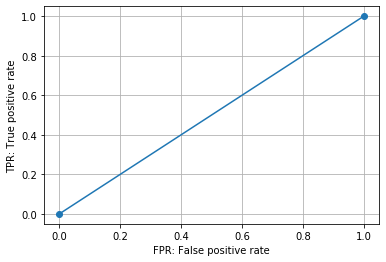

In [45]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

# 感度（再現率），特異度，精度（適合度），正確度を計算する．

In [16]:
true_p = 0
false_n = 0
total_posi_data = len(predict_positive_list)

false_p = 0
true_n = 0
total_nega_data = len(predict_negative_list)

for i in range(total_posi_data):
    if predict_positive_list[i][0] > predict_positive_list[i][1]:
        true_p = true_p + 1
    else:
        false_n = false_n + 1
for i in range(total_nega_data):
    if predict_negative_list[i][0] < predict_negative_list[i][1]:
        turue_n = false_n + 1
    else:
        false_p = false_p + 1
    
sensitivity = true_p/total_posi_data
specificity = true_n/total_nega_data

precision = true_p/(true_p+false_p)
accuracy = (true_p+true_n)/(total_posi_data+total_nega_data)

In [17]:
print(true_p)
print(false_n)
print(false_p)
print(true_n)


41
0
38
0


In [48]:
print(sensitivity)

1.0


In [49]:
print(specificity)

0.0


In [50]:
print(precision)

0.5189873417721519


In [51]:
print(accuracy)

0.5189873417721519


In [ ]:
print(sensitivity)
print(specificity)
print(precision)
print(accuracy)

In [20]:
df_table01 = pd.DataFrame(
    data={'予測（開裂）': [41, 38], 
          '予測（非開裂）': [0, 0]},
    index=['実際（開裂）', '実際（非開裂）']
)
 
df_table01

,予測（開裂）,予測（非開裂）
実際（開裂）,41,0
実際（非開裂）,38,0


In [ ]:
df3 = pd.DataFrame(
    data=np.array([[10, 20, 30, 40],
                   [11, 21, 31, 41],
                   [12, 22, 32, 42]]),
    index=['行1', '行2', '行3'],
    columns=['列1', '列2', '列3', '列4']
             )
df3

In [28]:
#predict_negative_list = model.predict(x_train_5crossval_negative)

In [43]:
#print(predict_negative_list)

In [44]:
print(len(predict_negative_list))

38


## saving the model.

In [52]:
#saving the model.
save_dir = "./saving_model/"
model_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./model_saving/20220731-232214 


## load model してみる．

https://www.tensorflow.org/guide/keras/save_and_serialize<br>
from tensorflow import keras model = keras.models.load_model('path/to/location')

In [9]:
#model = load_model("./model_saving/20220724-203049")
#from tensorflow import keras 
from tensorflow.keras.models import load_model
#model = load_model("./model_saving/20220724-203049")
model = load_model("./saving_model/20220731-232214")
#./model_saving/20220725-045012 
#モデルの構造を表示
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_01 (Conv2D)           (None, 1, 5, 3)           171       
_________________________________________________________________
Flatten_01 (Flatten)         (None, 15)                0         
_________________________________________________________________
Dense_out (Dense)            (None, 2)                 32        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 203
Trainable params: 203
Non-trainable params: 0
___

In [ ]:
plt.plot(range(1, NUM_EPOCHS+1), history.history['acc'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), history.history['val_acc'], "-o")
plt.title('model accuracy')
plt.ylabel('accuracy')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
#plt.ylim(0.95,1.0)
plt.show()

plt.plot(range(1, NUM_EPOCHS+1), history.history['loss'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), history.history['val_loss'], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
#plt.ylim(0.95,1.0)
plt.show()

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir ./log02/

## 学習後のモデルのパラメータを確認する．

In [ ]:
"""
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
%tensorboard --logdir=~/log/
%tensorboard --logdir=log02/ --port 43876

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
weights = model.get_weights()
print(weights)

In [ ]:
print(weights.shape())

In [ ]:
lay0 = model.layers[0] 

In [ ]:
print(lay0)

In [ ]:
print(lay0.get_weights())

In [ ]:
print(len(lay0.get_weights()))

In [ ]:
print(len(lay0.get_weights()[0]))

In [ ]:
print(lay0.get_weights()[0][0])

In [ ]:
print(len(lay0.get_weights()[0][0]))

In [ ]:
print(len(lay0.get_weights()[0][0][0]))

In [ ]:
lay1 = model.layers[1]

In [ ]:
print(lay1)

In [ ]:
print(lay1.get_weights())

In [ ]:
lay2 = model.layers[2]
print(lay2)

In [ ]:
print(lay2.get_weights())

In [ ]:
lay3 = model.layers[3]
print(lay3)

In [ ]:
print(len(lay3.get_weights()[0]))

In [ ]:
print(lay3.get_weights())

In [ ]:
lay4 = model.layers[4]
print(lay4)

In [ ]:
print(lay4.get_weights())

# FCで試す．

In [64]:
#訓練データ
x_train = x_train_all
y_train = y_train_all

#検証データ
x_val = x_train_all_5crossval 
y_val = y_train_all_5crossval 


#old_session = KTF.get_session()
#session = tf.Session('')
#KTF.set_session(session)
#KTF.set_learning_phase(1)

#modelの定義の前に重みのリセットが必要で，これ？
tf.compat.v1.Session()
#sess = tf.compat.v1.Session()

#モデル構築
model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(14, 8), strides=(1, 1), padding='valid', 
                 data_format="channels_last", dilation_rate=(1, 1), activation='relu', 
                 use_bias=True, input_shape=(14, 8, 1), kernel_initializer='glorot_uniform', 
                 bias_initializer='zeros',  name='Dense_01'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None, 
#                       name='MaxPooling2D_01'))
model.add(Flatten(name='Flatten_01'))
#model.add(Dropout(0.50))
#model.add(Dense(units=3, name='Denese_02', activation='relu'))
#model.add(Dense(units=50, name='Dense_01', activation='relu')
#model.add(Dense(units=10, name='Denese_03', activation='relu'))
model.add(Dense(units=2, name='Dense_out'))
model.add(Activation('softmax'))

#モデルの構造を表示
model.summary()

#訓練（学習）プロセスの設定
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])



#バリデーションロスが減少した場合に，各エポック終了後，モデルの重みを保存します
#checkpointer = ModelCheckpoint(filepath='./weights.hdf5', verbose=0, save_best_only=True, save_format="h5")
### add for TensorBoard
erly_stpg = EarlyStopping(patience=10, verbose=1,monitor='val_loss' , mode = 'min') 
chkfile = './callbacks/' + '{0:2d}'.format(Vernum)+'_{epoch:02d}-{val_loss:.4f}.hdf5' #format関数
check_point = ModelCheckpoint(filepath = chkfile, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
check_point = [check_point]

log_dir = "log/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
cbks=[tensorboard_callback]

#訓練の実行 
NUM_EPOCHS=100
NUM_BATCH=32
#history = model.fit(x_train, y_train, batch_size=NUM_BATCH, epochs=NUM_EPOCHS, validation_split=0.2, shuffle = True ,
#                    callbacks=[erly_stpg , chck_pont], verbose = 0, )
history = model.fit(x_train, y_train, batch_size=NUM_BATCH, epochs=NUM_EPOCHS, 
                    validation_split=0.2, shuffle = True, verbose = 0,
                    callbacks=check_point,
                   validation_data=(x_val, y_val))

print(type(history))
print(type(history.history))
print(history.history.keys())
print(history.history['loss'])
print(history.history['acc'])
print(history.history['val_loss'])
print(history.history['val_acc'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_01 (Conv2D)            (None, 1, 1, 3)           339       
_________________________________________________________________
Flatten_01 (Flatten)         (None, 3)                 0         
_________________________________________________________________
Dense_out (Dense)            (None, 2)                 8         
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.69286, saving model to ../callbacks/99_01-0.6929.hdf5

Epoch 00002: val_loss improved from 0.69286 to 0.69279, saving model to ../callbacks/99_02-0.6928.hdf5

Epoch 00003: val_loss improved from 0.69279 to 0.


Epoch 00097: val_loss did not improve from 0.69188

Epoch 00098: val_loss did not improve from 0.69188

Epoch 00099: val_loss did not improve from 0.69188

Epoch 00100: val_loss did not improve from 0.69188
<class 'tensorflow.python.keras.callbacks.History'>
<class 'dict'>
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
[1.8507559365278539, 0.6930148633496619, 0.6929257861823314, 0.6929196848854281, 0.6927812296885422, 0.6927599209340213, 0.6927274292575825, 0.6926768132564773, 0.6926901231428803, 0.6926038351720816, 0.6926246411416809, 0.692551650459458, 0.6926490153047941, 0.692517302577804, 0.692563861138437, 0.6924924903111503, 0.6925193958854073, 0.6924716452318788, 0.6924807275131297, 0.692553431453765, 0.6924201024443569, 0.692481974321961, 0.6924819748860428, 0.6924320587224388, 0.6924239120648863, 0.6924298153690736, 0.6924153987541559, 0.6923782421211339, 0.6924041757824293, 0.6923890503047017, 0.6924025519789205, 0.6923842097306477, 0.6923592985616498, 0.6924110201631059,

In [66]:
df1 = pd.DataFrame(
    data={'loss':history.history['loss'], 
          'acc':history.history['acc'],
          'val_loss':history.history['val_loss'], 
          'val_acc':history.history['val_acc']
         }, 
    index=np.arange(0, 100)
)
 
df1

,loss,acc,val_loss,val_acc
0,1.850756,0.526814,0.692862,0.525641
1,0.693015,0.520505,0.692794,0.525641
2,0.692926,0.520505,0.692723,0.525641
3,0.692920,0.520505,0.692649,0.525641
4,0.692781,0.520505,0.692597,0.525641
...,...,...,...,...
95,0.692389,0.520505,0.691884,0.525641
96,0.692398,0.520505,0.691886,0.525641
97,0.692334,0.520505,0.691885,0.525641
98,0.692362,0.520505,0.691886,0.525641


In [67]:
i=8
j=3
k=0
m=32
n=100

df2 = pd.DataFrame(
    data={'Kernel':f'14x{i}',
         'Conv2D':str(j),
         'hidden01':str(k),
         'Batch_size':str(m),
         'epochs':str(n)}, 
    index=np.arange(4)
)
df2

,Kernel,Conv2D,hidden01,Batch_size,epochs
0,14x8,3,0,32,100
1,14x8,3,0,32,100
2,14x8,3,0,32,100
3,14x8,3,0,32,100


In [68]:
print(pd.concat([df1, df2], axis=1))
df3 = pd.concat([df1, df2], axis=1)

        loss       acc  val_loss   val_acc Kernel Conv2D hidden01 Batch_size  \
0   1.850756  0.526814  0.692862  0.525641   14x8      3        0         32   
1   0.693015  0.520505  0.692794  0.525641   14x8      3        0         32   
2   0.692926  0.520505  0.692723  0.525641   14x8      3        0         32   
3   0.692920  0.520505  0.692649  0.525641   14x8      3        0         32   
4   0.692781  0.520505  0.692597  0.525641    NaN    NaN      NaN        NaN   
..       ...       ...       ...       ...    ...    ...      ...        ...   
95  0.692389  0.520505  0.691884  0.525641    NaN    NaN      NaN        NaN   
96  0.692398  0.520505  0.691886  0.525641    NaN    NaN      NaN        NaN   
97  0.692334  0.520505  0.691885  0.525641    NaN    NaN      NaN        NaN   
98  0.692362  0.520505  0.691886  0.525641    NaN    NaN      NaN        NaN   
99  0.692455  0.520505  0.691884  0.525641    NaN    NaN      NaN        NaN   

   epochs  
0     100  
1     100  
2  

In [69]:
var = "FC_02"
filename = f'./fitting_model/FCvsCNN/FC/trial_{var}.csv'
df3.to_csv(filename)

In [70]:
df3.iloc[0:5, :]

,loss,acc,val_loss,val_acc,Kernel,Conv2D,hidden01,Batch_size,epochs
0,1.850756,0.526814,0.692862,0.525641,14x8,3,0,32,100
1,0.693015,0.520505,0.692794,0.525641,14x8,3,0,32,100
2,0.692926,0.520505,0.692723,0.525641,14x8,3,0,32,100
3,0.692920,0.520505,0.692649,0.525641,14x8,3,0,32,100
4,0.692781,0.520505,0.692597,0.525641,NaN,NaN,NaN,NaN,NaN


In [71]:
df3.iloc[300-5:300, :]

,loss,acc,val_loss,val_acc,Kernel,Conv2D,hidden01,Batch_size,epochs


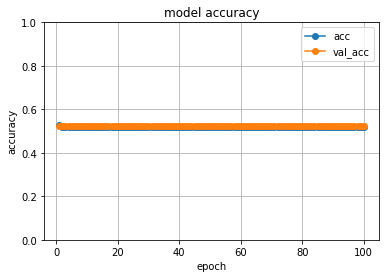

In [72]:
plt.plot(range(1, NUM_EPOCHS+1), df3['acc'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), df3['val_acc'], "-o")
plt.title('model accuracy')
plt.ylabel('accuracy')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

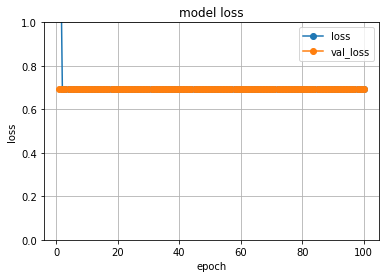

In [73]:
plt.plot(range(1, NUM_EPOCHS+1), df3['loss'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), df3['val_loss'], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

In [77]:
loss, acc = model.evaluate(x_val, y_val)
print(f"Test Loss: {loss*100}%")
print(f"Test Acc: {acc*100}%")

78/78 [==============================] - 0s 23us/sample - loss: 0.6919 - acc: 0.5256
Test Loss: 69.18841340602972%
Test Acc: 52.56410241127014%


In [22]:
predict_positive_list = model.predict(x_train_positive_all_5crossval)

In [23]:
predict_negative_list = model.predict(x_train_negative_all_5crossval)

In [ ]:
#predict_positive_list = model.predict(x_train_positive_all_5crossval)
#predict_negative_list = model.predict(x_train_negative_all_5crossval)

In [24]:
predict_positive_list

array([[0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.

In [25]:
predict_negative_list

array([[0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.52052575, 0.47947422],
       [0.

In [39]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_true = [0, 0, 0, 0, 1, 1, 1, 1]
y_score = [0.2, 0.3, 0.6, 0.8, 0.4, 0.5, 0.7, 0.9]

y_true01 = []
y_score01 = []
for i in range(len(predict_positive_list)):
    y_true01.append(predict_positive_list[i][0])
    y_score01.append(1)
for i  in range(len(predict_negative_list)):
    y_true01.append(predict_negative_list[i][0])
    y_score01.append(0)
        
y_true01 = list(y_true01)
y_score01 = list(y_score01)

#roc = roc_curve(y_true01, y_score01)

#print(type(roc))
# <class 'tuple'>

#print(len(roc))
# 3

ValueError: continuous format is not supported

In [40]:
print(y_true01)

[0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575, 0.52052575]


In [41]:
y_score01

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [36]:
fpr, tpr, thresholds = roc_curve(y_true01, y_score01)

print(fpr)
# [0.   0.   0.25 0.25 0.5  0.5  1.  ]

print(tpr)
# [0.   0.25 0.25 0.5  0.5  1.   1.  ]

print(thresholds)
# [1.9 0.9 0.8 0.7 0.6 0.4 0.2]

ValueError: continuous format is not supported

In [42]:
fpr = [0, 1]
tpr = [0, 1]

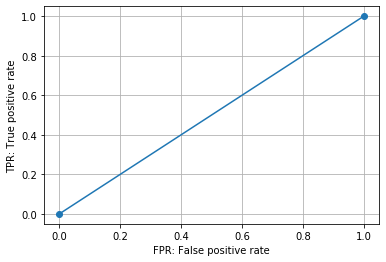

In [43]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
#plt.savefig('data/dst/sklearn_roc_curve.png')

# 感度（再現率），特異度，精度（適合度），正確度を計算する．

In [26]:
true_p = 0
false_n = 0
total_posi_data = len(predict_positive_list)

false_p = 0
true_n = 0
total_nega_data = len(predict_negative_list)

for i in range(total_posi_data):
    if predict_positive_list[i][0] > predict_positive_list[i][1]:
        true_p = true_p + 1
    else:
        false_n = false_n + 1
for i in range(total_nega_data):
    if predict_negative_list[i][0] < predict_negative_list[i][1]:
        turue_n = false_n + 1
    else:
        false_p = false_p + 1
    
sensitivity = true_p/total_posi_data
specificity = true_n/total_nega_data

precision = true_p/(true_p+false_p)
accuracy = (true_p+true_n)/(total_posi_data+total_nega_data)

In [27]:
print(true_p)
print(false_n)
print(false_p)
print(true_n)

41
0
38
0


In [28]:
df_table02 = pd.DataFrame(
    data={'予測（開裂）': [41, 38], 
          '予測（非開裂）': [0, 0]},
    index=['実際（開裂）', '実際（非開裂）']
)
 
df_table02

,予測（開裂）,予測（非開裂）
実際（開裂）,41,0
実際（非開裂）,38,0


In [83]:
print(sensitivity)
print(specificity)
print(precision)
print(accuracy)

1.0
0.0
0.5189873417721519
0.5189873417721519


In [76]:
#saving the model.
save_dir = "./saving_model/"
model_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S_FC02")
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./model_saving/20220731-232944_FC02 


In [21]:
model = load_model("./saving_model/20220731-232944_FC02")

## CNN various experiment

In [40]:
#Vurnum = 実験番号
Vernum = 92

In [53]:
#訓練データ
x_train = x_train_all
y_train = y_train_all

#検証データ
x_val = x_train_all_5crossval 
y_val = y_train_all_5crossval 

i=4 #Kernel width
j=10 #the number of Filters
k=10 #the number of hidden layers
m=32 #Batch size
n=100 #epochs


#old_session = KTF.get_session()
#session = tf.Session('')
#KTF.set_session(session)
#KTF.set_learning_phase(1)

#modelの定義の前に重みのリセットが必要で，これ？
tf.compat.v1.Session()
#sess = tf.compat.v1.Session()

#モデル構築
model = Sequential()
model.add(Conv2D(filters=j, kernel_size=(14, i), strides=(1, 1), padding='valid', 
                 data_format="channels_last", dilation_rate=(1, 1), activation='relu', 
                 use_bias=True, input_shape=(14, 8, 1), kernel_initializer='glorot_uniform', 
                 bias_initializer='zeros',  name='Conv2D_01'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None, 
#                       name='MaxPooling2D_01'))
model.add(Flatten(name='Flatten_01'))
#model.add(Dropout(0.50))
model.add(Dense(units=k, name='Denese_02', activation='relu'))
#model.add(Dense(units=50, name='Dense_01', activation='relu')
#model.add(Dense(units=10, name='Denese_03', activation='relu'))
model.add(Dense(units=2, name='Dense_out'))
model.add(Activation('softmax'))

#モデルの構造を表示
model.summary()

#訓練（学習）プロセスの設定
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])



#バリデーションロスが減少した場合に，各エポック終了後，モデルの重みを保存します
#checkpointer = ModelCheckpoint(filepath='./weights.hdf5', verbose=0, save_best_only=True, save_format="h5")
### add for TensorBoard
erly_stpg = EarlyStopping(patience=10, verbose=1,monitor='val_loss' , mode = 'min') 
chkfile = './callbacks/' + '{0:2d}'.format(Vernum)+'_{epoch:02d}-{val_loss:.4f}.hdf5' #format関数
check_point = ModelCheckpoint(filepath = chkfile, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
check_point = [check_point]

log_dir = "log/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
cbks=[tensorboard_callback]

#訓練の実行 
NUM_BATCH=m
NUM_EPOCHS=n

#history = model.fit(x_train, y_train, batch_size=NUM_BATCH, epochs=NUM_EPOCHS, validation_split=0.2, shuffle = True ,
#                    callbacks=[erly_stpg , chck_pont], verbose = 0, )
history = model.fit(x_train, y_train, batch_size=NUM_BATCH, epochs=NUM_EPOCHS, 
                    validation_split=0.2, shuffle = True, verbose = 0,
                    callbacks=check_point,
                   validation_data=(x_val, y_val))

print(type(history))
print(type(history.history))
print(history.history.keys())
print(history.history['loss'])
print(history.history['acc'])
print(history.history['val_loss'])
print(history.history['val_acc'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_01 (Conv2D)           (None, 1, 5, 10)          570       
_________________________________________________________________
Flatten_01 (Flatten)         (None, 50)                0         
_________________________________________________________________
Denese_02 (Dense)            (None, 10)                510       
_________________________________________________________________
Dense_out (Dense)            (None, 2)                 22        
_________________________________________________________________
activation_4 (Activation)    (None, 2)                 0         
Total params: 1,102
Trainable params: 1,102
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.65646, saving model to ../callbacks/92_01-0.6565.hdf5

Epoch 00002: val_

In [55]:
df1 = pd.DataFrame(
    data={'loss':history.history['loss'], 
          'acc':history.history['acc'],
          'val_loss':history.history['val_loss'], 
          'val_acc':history.history['val_acc']
         }, 
    index=np.arange(0, n)
)
 
df1

,loss,acc,val_loss,val_acc
0,5.208111,0.492114,0.656456,0.512821
1,0.647019,0.529968,0.573409,0.743590
2,0.550017,0.659306,0.527969,0.705128
3,0.505235,0.719243,0.486668,0.679487
4,0.486165,0.725552,0.489650,0.743590
...,...,...,...,...
95,0.237535,0.914827,0.728729,0.756410
96,0.224672,0.917981,0.798381,0.769231
97,0.219918,0.921136,0.842796,0.820513
98,0.247409,0.899054,0.819014,0.782051


In [56]:
df2 = pd.DataFrame(
    data={'Kernel':f'14x{i}',
         'Conv2D':str(j),
         'hidden01':str(k),
         'Batch_size':str(m),
         'epochs':str(n)}, 
    index=np.arange(4)
)
df2

,Kernel,Conv2D,hidden01,Batch_size,epochs
0,14x4,10,10,32,100
1,14x4,10,10,32,100
2,14x4,10,10,32,100
3,14x4,10,10,32,100


In [57]:
print(pd.concat([df1, df2], axis=1))
df3 = pd.concat([df1, df2], axis=1)

        loss       acc  val_loss   val_acc Kernel Conv2D hidden01 Batch_size  \
0   5.208111  0.492114  0.656456  0.512821   14x4     10       10         32   
1   0.647019  0.529968  0.573409  0.743590   14x4     10       10         32   
2   0.550017  0.659306  0.527969  0.705128   14x4     10       10         32   
3   0.505235  0.719243  0.486668  0.679487   14x4     10       10         32   
4   0.486165  0.725552  0.489650  0.743590    NaN    NaN      NaN        NaN   
..       ...       ...       ...       ...    ...    ...      ...        ...   
95  0.237535  0.914827  0.728729  0.756410    NaN    NaN      NaN        NaN   
96  0.224672  0.917981  0.798381  0.769231    NaN    NaN      NaN        NaN   
97  0.219918  0.921136  0.842796  0.820513    NaN    NaN      NaN        NaN   
98  0.247409  0.899054  0.819014  0.782051    NaN    NaN      NaN        NaN   
99  0.279154  0.883281  0.587356  0.717949    NaN    NaN      NaN        NaN   

   epochs  
0     100  
1     100  
2  

In [58]:
var = "CNN_various_04"
filename = f'./fitting_model/FCvsCNN/CNN/trial_{var}.csv'
df3.to_csv(filename)

In [61]:
df3.iloc[n-5:n, :]

,loss,acc,val_loss,val_acc,Kernel,Conv2D,hidden01,Batch_size,epochs
95,0.237535,0.914827,0.728729,0.756410,NaN,NaN,NaN,NaN,NaN
96,0.224672,0.917981,0.798381,0.769231,NaN,NaN,NaN,NaN,NaN
97,0.219918,0.921136,0.842796,0.820513,NaN,NaN,NaN,NaN,NaN
98,0.247409,0.899054,0.819014,0.782051,NaN,NaN,NaN,NaN,NaN
99,0.279154,0.883281,0.587356,0.717949,NaN,NaN,NaN,NaN,NaN


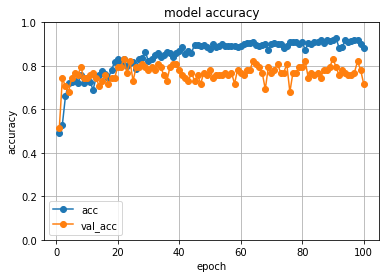

In [62]:
plt.plot(range(1, NUM_EPOCHS+1), df3['acc'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), df3['val_acc'], "-o")
plt.title('model accuracy')
plt.ylabel('accuracy')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

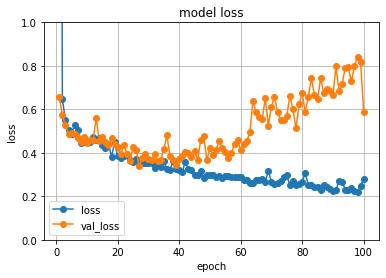

In [63]:
plt.plot(range(1, NUM_EPOCHS+1), df3['loss'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), df3['val_loss'], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

epochs = 27が最適

In [64]:
loss, acc = model.evaluate(x_val, y_val)
print(f"Test Loss: {loss*100}%")
print(f"Test Acc: {acc*100}%")

78/78 [==============================] - 0s 27us/sample - loss: 0.5874 - acc: 0.7179
Test Loss: 58.73559522323119%
Test Acc: 71.79487347602844%


In [65]:
#saving the model.
save_dir = "./saving_model/"
model_name = datetime.datetime.now().strftime(f"%Y%m%d-%H%M%S_{Vernum}")
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ../model_saving/20220729-170841_92 


In [123]:
model = load_model("./saving_model/20220729-170841_92")

In [124]:
predict_positive_list = model.predict(x_train_positive_all_5crossval)
predict_negative_list = model.predict(x_train_negative_all_5crossval)

In [125]:
predict_positive_list

array([[0.88397264, 0.11602733],
       [0.74449414, 0.25550583],
       [0.7555597 , 0.24444032],
       [0.76919335, 0.23080663],
       [0.95889753, 0.04110249],
       [0.70507395, 0.29492608],
       [0.75558144, 0.24441858],
       [0.97986364, 0.02013636],
       [0.799293  , 0.20070697],
       [0.9547113 , 0.04528872],
       [0.72148937, 0.27851063],
       [0.9331363 , 0.06686372],
       [0.9215211 , 0.07847881],
       [0.5593215 , 0.44067845],
       [0.8168304 , 0.18316956],
       [0.79477096, 0.20522904],
       [0.4462819 , 0.55371803],
       [0.79477096, 0.20522904],
       [0.8350128 , 0.16498718],
       [0.9640158 , 0.03598418],
       [0.44760248, 0.5523975 ],
       [0.8633081 , 0.13669196],
       [0.5421242 , 0.45787582],
       [0.5686558 , 0.43134418],
       [0.96186286, 0.03813717],
       [0.7555597 , 0.24444032],
       [0.82833695, 0.171663  ],
       [0.8444744 , 0.15552567],
       [0.98601764, 0.01398236],
       [0.8574303 , 0.14256975],
       [0.

In [126]:
len(predict_positive_list)

41

In [127]:
predict_negative_list 

array([[8.4430087e-01, 1.5569909e-01],
       [1.0793193e-01, 8.9206809e-01],
       [5.3772569e-01, 4.6227431e-01],
       [4.3315998e-01, 5.6683999e-01],
       [2.2218426e-01, 7.7781570e-01],
       [8.3401859e-01, 1.6598146e-01],
       [8.1879960e-05, 9.9991810e-01],
       [6.5612160e-02, 9.3438786e-01],
       [8.3401859e-01, 1.6598146e-01],
       [5.3217709e-01, 4.6782291e-01],
       [3.4250077e-03, 9.9657494e-01],
       [1.8038282e-02, 9.8196167e-01],
       [7.1512413e-01, 2.8487587e-01],
       [6.5517688e-01, 3.4482318e-01],
       [9.3751110e-02, 9.0624893e-01],
       [5.1779454e-05, 9.9994826e-01],
       [2.5801424e-02, 9.7419864e-01],
       [8.8833690e-02, 9.1116631e-01],
       [4.9036461e-01, 5.0963533e-01],
       [4.3315998e-01, 5.6683999e-01],
       [4.9540576e-02, 9.5045936e-01],
       [1.8873709e-01, 8.1126291e-01],
       [5.8140737e-01, 4.1859263e-01],
       [5.7861888e-01, 4.2138109e-01],
       [5.2306134e-01, 4.7693869e-01],
       [8.5048750e-03, 9.

In [128]:
len(predict_negative_list)

38

In [129]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_true = [0, 0, 0, 0, 1, 1, 1, 1]
y_score = [0.2, 0.3, 0.6, 0.8, 0.4, 0.5, 0.7, 0.9]

y_true01 = []
y_score01 = []
for i in range(len(predict_positive_list)):
    y_true01.append(1)
    y_score01.append(predict_positive_list[i][0])
for i  in range(len(predict_negative_list)):
    y_true01.append(0)
    y_score01.append(predict_negative_list[i][0])
        
y_true01 = list(y_true01)
y_score01 = list(y_score01)

#roc = roc_curve(y_true01, y_score01)

#print(type(roc))
# <class 'tuple'>

#print(len(roc))
# 3

In [130]:
fpr, tpr, thresholds = roc_curve(y_true01, y_score01)

print(fpr)
# [0.   0.   0.25 0.25 0.5  0.5  1.  ]

print(tpr)
# [0.   0.25 0.25 0.5  0.5  1.   1.  ]

print(thresholds)
# [1.9 0.9 0.8 0.7 0.6 0.4 0.2]

[0.         0.         0.         0.02631579 0.02631579 0.05263158
 0.05263158 0.10526316 0.10526316 0.10526316 0.10526316 0.10526316
 0.10526316 0.13157895 0.13157895 0.15789474 0.15789474 0.18421053
 0.18421053 0.28947368 0.28947368 0.39473684 0.39473684 0.42105263
 0.47368421 1.        ]
[0.         0.02439024 0.31707317 0.31707317 0.46341463 0.46341463
 0.48780488 0.48780488 0.58536585 0.63414634 0.70731707 0.75609756
 0.7804878  0.7804878  0.80487805 0.80487805 0.85365854 0.85365854
 0.87804878 0.87804878 0.95121951 0.95121951 1.         1.
 1.         1.        ]
[1.9860177e+00 9.8601764e-01 9.0495247e-01 9.0057832e-01 8.4447438e-01
 8.4430087e-01 8.3501279e-01 8.3401859e-01 7.9929298e-01 7.9477096e-01
 7.5558144e-01 7.5555968e-01 7.4449414e-01 7.4372149e-01 7.2148937e-01
 7.1512413e-01 7.0339006e-01 6.9706821e-01 6.5887594e-01 5.7651299e-01
 5.4212421e-01 4.9036461e-01 4.4628191e-01 4.3615726e-01 4.3315998e-01
 5.1779454e-05]


In [120]:
from sklearn import metrics

list_label = [0, 0, 0, 1, 1, 0, 1, 1]
list_score = [2, 1, 2, 4, 2, 1, 3, 5]

auc = metrics.roc_auc_score(list_label, list_score)
print(auc)

fpr, tpr, thresholds = metrics.roc_curve(list_label, list_score)
auc = metrics.auc(fpr, tpr)
print(auc)

0.9375
0.9375


In [131]:
auc = metrics.roc_auc_score(y_true01, y_score01)
print(auc)

0.9082156611039796


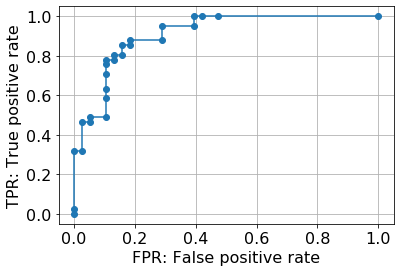

In [132]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
#plt.savefig('data/dst/sklearn_roc_curve.png')

引数を左右逆にしてた．
https://nishiohirokazu.hatenadiary.org/entry/20150601/1433165478


## 感度（再現率），特異度，精度（適合度），正確度を計算する．

In [74]:
true_p = 0
false_n = 0
total_posi_data = len(predict_positive_list)

false_p = 0
true_n = 0
total_nega_data = len(predict_negative_list)

for i in range(total_posi_data):
    if predict_positive_list[i][0] > predict_positive_list[i][1]:
        true_p = true_p + 1
    else:
        false_n = false_n + 1
        
for i in range(total_nega_data):
    if predict_negative_list[i][0] < predict_negative_list[i][1]:
        true_n = true_n + 1
    else:
        false_p = false_p + 1
    
sensitivity = true_p/total_posi_data
print(sensitivity)
specificity = true_n/total_nega_data

precision = true_p/(true_p+false_p)
accuracy = (true_p+true_n)/(total_posi_data+total_nega_data)

0.9512195121951219


In [70]:
print(total_posi_data)

41


In [71]:
print(total_nega_data)

38


In [64]:
print(true_p)
print(false_n)
print(false_p)
print(true_n)
print(true_p+false_n+false_p+true_n)

39
2
14
24
79


In [76]:
df_table02 = pd.DataFrame(
    data={'予測（開裂）': [true_p, false_p], 
          '予測（非開裂）': [false_n, true_n]},
    index=['実際（開裂）', '実際（非開裂）']
)
 
df_table02

,予測（開裂）,予測（非開裂）
実際（開裂）,39,2
実際（非開裂）,14,24


In [73]:
print(sensitivity)
print(specificity)
print(precision)
print(accuracy)

0.9512195121951219
0.631578947368421
0.7358490566037735
0.7974683544303798


In [67]:
print(39/(39+14))

0.7358490566037735


In [68]:
print(24/(2+24))

0.9230769230769231


# CNN various experiment 02

In [84]:
#訓練データ
x_train = x_train_all
y_train = y_train_all

#検証データ
x_val = x_train_all_5crossval 
y_val = y_train_all_5crossval 

i=4 #Kernel width
j=10 #the number of Filters
k=10 #the number of hidden layers
m=32 #Batch size
n=27 #epochs


#old_session = KTF.get_session()
#session = tf.Session('')
#KTF.set_session(session)
#KTF.set_learning_phase(1)

#modelの定義の前に重みのリセットが必要で，これ？
tf.compat.v1.Session()
#sess = tf.compat.v1.Session()

#モデル構築
model = Sequential()
model.add(Conv2D(filters=j, kernel_size=(14, i), strides=(1, 1), padding='valid', 
                 data_format="channels_last", dilation_rate=(1, 1), activation='relu', 
                 use_bias=True, input_shape=(14, 8, 1), kernel_initializer='glorot_uniform', 
                 bias_initializer='zeros',  name='Conv2D_01'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None, 
#                       name='MaxPooling2D_01'))
model.add(Flatten(name='Flatten_01'))
#model.add(Dropout(0.50))
model.add(Dense(units=k, name='Denese_02', activation='relu'))
#model.add(Dense(units=50, name='Dense_01', activation='relu')
#model.add(Dense(units=10, name='Denese_03', activation='relu'))
model.add(Dense(units=2, name='Dense_out'))
model.add(Activation('softmax'))

#モデルの構造を表示
model.summary()

#訓練（学習）プロセスの設定
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])



#バリデーションロスが減少した場合に，各エポック終了後，モデルの重みを保存します
#checkpointer = ModelCheckpoint(filepath='./weights.hdf5', verbose=0, save_best_only=True, save_format="h5")
### add for TensorBoard
erly_stpg = EarlyStopping(patience=10, verbose=1,monitor='val_loss' , mode = 'min') 
chkfile = './callbacks/' + '{0:2d}'.format(Vernum)+'_{epoch:02d}-{val_loss:.4f}.hdf5' #format関数
check_point = ModelCheckpoint(filepath = chkfile, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
check_point = [check_point]

log_dir = "log/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
cbks=[tensorboard_callback]

#訓練の実行 
NUM_BATCH=m
NUM_EPOCHS=n

#history = model.fit(x_train, y_train, batch_size=NUM_BATCH, epochs=NUM_EPOCHS, validation_split=0.2, shuffle = True ,
#                    callbacks=[erly_stpg , chck_pont], verbose = 0, )
history = model.fit(x_train, y_train, batch_size=NUM_BATCH, epochs=NUM_EPOCHS, 
                    validation_split=0.2, shuffle = True, verbose = 0,
                    callbacks=check_point,
                   validation_data=(x_val, y_val))

print(type(history))
print(type(history.history))
print(history.history.keys())
print(history.history['loss'])
print(history.history['acc'])
print(history.history['val_loss'])
print(history.history['val_acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_01 (Conv2D)           (None, 1, 5, 10)          570       
_________________________________________________________________
Flatten_01 (Flatten)         (None, 50)                0         
_________________________________________________________________
Denese_02 (Dense)            (None, 10)                510       
_________________________________________________________________
Dense_out (Dense)            (None, 2)                 22        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 1,102
Trainable params: 1,102
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.59521, saving model to ../callbacks/99_01-0.5952.hdf5

Epoch 00002: val_

In [85]:
df1 = pd.DataFrame(
    data={'loss':history.history['loss'], 
          'acc':history.history['acc'],
          'val_loss':history.history['val_loss'], 
          'val_acc':history.history['val_acc']
         }, 
    index=np.arange(0, n)
)
 
df1

,loss,acc,val_loss,val_acc
0,7.748244,0.558360,0.595211,0.743590
1,0.565617,0.750789,0.548186,0.769231
2,0.545509,0.735016,0.637604,0.705128
3,0.530145,0.798107,0.548174,0.769231
4,0.488850,0.785489,0.539621,0.705128
5,0.419711,0.851735,0.536843,0.730769
6,0.458033,0.766562,0.509264,0.807692
7,0.344365,0.870662,0.579813,0.782051
8,0.523989,0.722397,0.572068,0.730769
9,0.340369,0.858044,0.508488,0.769231


In [86]:
df2 = pd.DataFrame(
    data={'Kernel':f'14x{i}',
         'Conv2D':str(j),
         'hidden01':str(k),
         'Batch_size':str(m),
         'epochs':str(n)}, 
    index=np.arange(4)
)
df2

,Kernel,Conv2D,hidden01,Batch_size,epochs
0,14x4,10,10,32,27
1,14x4,10,10,32,27
2,14x4,10,10,32,27
3,14x4,10,10,32,27


In [87]:
print(pd.concat([df1, df2], axis=1))
df3 = pd.concat([df1, df2], axis=1)

        loss       acc  val_loss   val_acc Kernel Conv2D hidden01 Batch_size  \
0   7.748244  0.558360  0.595211  0.743590   14x4     10       10         32   
1   0.565617  0.750789  0.548186  0.769231   14x4     10       10         32   
2   0.545509  0.735016  0.637604  0.705128   14x4     10       10         32   
3   0.530145  0.798107  0.548174  0.769231   14x4     10       10         32   
4   0.488850  0.785489  0.539621  0.705128    NaN    NaN      NaN        NaN   
5   0.419711  0.851735  0.536843  0.730769    NaN    NaN      NaN        NaN   
6   0.458033  0.766562  0.509264  0.807692    NaN    NaN      NaN        NaN   
7   0.344365  0.870662  0.579813  0.782051    NaN    NaN      NaN        NaN   
8   0.523989  0.722397  0.572068  0.730769    NaN    NaN      NaN        NaN   
9   0.340369  0.858044  0.508488  0.769231    NaN    NaN      NaN        NaN   
10  0.347092  0.854890  0.549935  0.782051    NaN    NaN      NaN        NaN   
11  0.359223  0.848580  0.502984  0.7307

In [88]:
var = "CNN_various_05"
filename = f'./fitting_model/FCvsCNN/CNN/trial_{var}.csv'
df3.to_csv(filename)

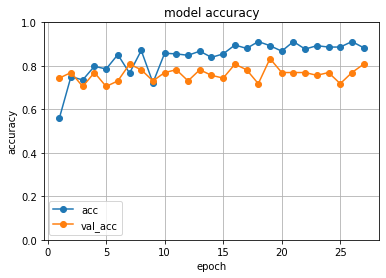

In [89]:
plt.plot(range(1, NUM_EPOCHS+1), df3['acc'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), df3['val_acc'], "-o")
plt.title('model accuracy')
plt.ylabel('accuracy')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

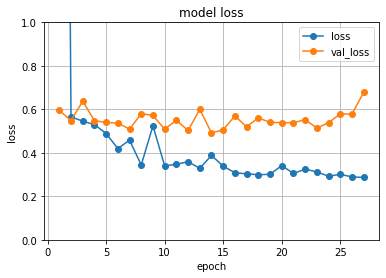

In [90]:
plt.plot(range(1, NUM_EPOCHS+1), df3['loss'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), df3['val_loss'], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

epochs = 23がより最適だ．

In [91]:
loss, acc = model.evaluate(x_val, y_val)
print(f"Test Loss: {loss*100}%")
print(f"Test Acc: {acc*100}%")

78/78 [==============================] - 0s 24us/sample - loss: 0.6780 - acc: 0.8077
Test Loss: 67.79744376738867%
Test Acc: 80.7692289352417%


In [92]:
Vernum=99

In [94]:
#saving the model.
save_dir = "./saving_model/"
model_name = datetime.datetime.now().strftime(f"%Y%m%d-%H%M%S_CNN_{Vernum}")
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./model_saving/20220801-034541_CNN_99 


In [95]:
predict_positive_list = model.predict(x_train_positive_all_5crossval)
predict_negative_list = model.predict(x_train_negative_all_5crossval)

In [118]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_true = [0, 0, 0, 0, 1, 1, 1, 1]
y_score = [0.2, 0.3, 0.6, 0.8, 0.4, 0.5, 0.7, 0.9]

y_true01 = []
y_score01 = []
for i in range(len(predict_positive_list)):
    y_true01.append(1)
    y_score01.append(predict_positive_list[i][0])
for i  in range(len(predict_negative_list)):
    y_true01.append(0)
    y_score01.append(predict_negative_list[i][0])
        
y_true01 = list(y_true01)
y_score01 = list(y_score01)

#roc = roc_curve(y_true01, y_score01)

#print(type(roc))
# <class 'tuple'>

#print(len(roc))
# 3

In [97]:
fpr, tpr, thresholds = roc_curve(y_true01, y_score01)

print(fpr)
# [0.   0.   0.25 0.25 0.5  0.5  1.  ]

print(tpr)
# [0.   0.25 0.25 0.5  0.5  1.   1.  ]

print(thresholds)
# [1.9 0.9 0.8 0.7 0.6 0.4 0.2]

[0.         0.         0.         0.05263158 0.05263158 0.07894737
 0.07894737 0.13157895 0.13157895 0.15789474 0.15789474 0.21052632
 0.21052632 0.23684211 0.23684211 0.23684211 0.23684211 0.23684211
 0.23684211 0.36842105 0.36842105 0.39473684 0.39473684 0.47368421
 0.47368421 1.        ]
[0.         0.02439024 0.24390244 0.24390244 0.36585366 0.36585366
 0.3902439  0.3902439  0.48780488 0.48780488 0.63414634 0.63414634
 0.70731707 0.70731707 0.73170732 0.7804878  0.80487805 0.85365854
 0.90243902 0.90243902 0.92682927 0.92682927 0.95121951 0.95121951
 1.         1.        ]
[1.97698092e+00 9.76980984e-01 8.93442750e-01 8.70414615e-01
 8.44122052e-01 8.30879807e-01 8.17082465e-01 8.07344854e-01
 7.02091634e-01 6.90217793e-01 5.65151572e-01 4.60140467e-01
 4.26620215e-01 3.46877396e-01 3.14932078e-01 2.66016960e-01
 2.01172546e-01 1.88423797e-01 1.67583391e-01 1.14207216e-01
 1.11092389e-01 8.30488503e-02 6.64380714e-02 5.06677590e-02
 3.46020162e-02 2.53762451e-08]


In [103]:
len(fpr)

26

In [104]:
height = 0
area = 0

for i in range(len(fpr)-1):
    if fpr[i+1] - fpr[i] == 0:
        height = height + (tpr[i+1] - tpr[i])
        continue
    else:
        area = area + (fpr[i+1]-fpr[i])*height
        height = 0
print(f'area: {area}')

area: 0.08344030808729141


https://www.web-dev-qa-db-ja.com/ja/python/%E6%9B%B2%E7%B7%9A%E4%B8%8B%E3%81%AE%E9%83%A8%E5%88%86%E9%9D%A2%E7%A9%8D%EF%BC%88auc%EF%BC%89%E3%81%AE%E8%A8%88%E7%AE%97%E6%96%B9%E6%B3%95/828374859/

In [105]:
y = np.array([0, 0, 1, 1])

scores = np.array([0.1, 0.4, 0.35, 0.8])
metrics.roc_auc_score(y, scores)

NameError: name 'metrics' is not defined

In [115]:
'''
import itertools
import operator

def auc_from_fpr_tpr(fpr, tpr, trapezoid=False):
    inds = [i for (i, (s, e)) in enumerate(Zip(fpr[: -1], fpr[1: ])) if s != e] + [len(fpr) - 1]
    fpr, tpr = fpr[inds], tpr[inds]
    area = 0
    ft = Zip(fpr, tpr)
    for p0, p1 in Zip(ft[: -1], ft[1: ]):
        area += (p1[0] - p0[0]) * ((p1[1] + p0[1]) / 2 if trapezoid else p0[1])
    return area

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-115-9844e3f0aab3>, line 12)

In [114]:
#auc_from_fpr_tpr(fpr, tpr)

https://cookie-box.hatenablog.com/entry/2019/02/10/182619

In [109]:
from sklearn import metrics

list_label = [0, 0, 0, 1, 1, 0, 1, 1]
list_score = [2, 1, 2, 4, 2, 1, 3, 5]

auc = metrics.roc_auc_score(list_label, list_score)
print(auc)

fpr, tpr, thresholds = metrics.roc_curve(list_label, list_score)
auc = metrics.auc(fpr, tpr)
print(auc)

0.9375
0.9375


In [119]:
auc = metrics.roc_auc_score(y_true01, y_score01)
print(auc)

0.8523748395378692


findfont: Font family ['Ume Gothic O5'] not found. Falling back to DejaVu Sans.


fpr:  [0.  0.  0.  0.5 1. ]
tpr:  [0.   0.25 0.75 1.   1.  ]
thresholds:  [6 5 3 2 1]


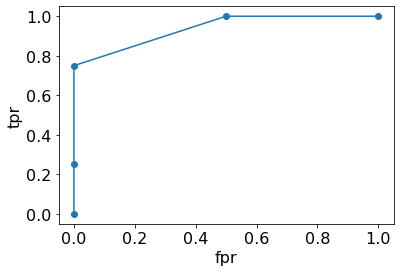

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4
rcParams['font.family'] = 'Ume Gothic O5'
rcParams['font.size'] = 16

print("fpr: ", fpr)
print("tpr: ", tpr)
print("thresholds: ", thresholds)

plt.plot(fpr, tpr, marker="o")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

fpr:  [0.  0.  0.  0.  0.5 1. ]
tpr:  [0.   0.25 0.5  0.75 1.   1.  ]
thresholds:  [6 5 4 3 2 1]


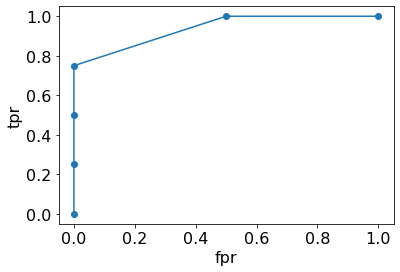

In [111]:
fpr, tpr, thresholds = metrics.roc_curve(list_label, list_score, drop_intermediate=False)
print("fpr: ", fpr)
print("tpr: ", tpr)
print("thresholds: ", thresholds)

plt.plot(fpr, tpr, marker="o")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [112]:
import numpy as np
from sklearn.utils.extmath import stable_cumsum

def my_binary_clf_curve(y_true, y_score, pos_label=None):
    y_true = np.array(y_true)
    y_score = np.array(y_score)

    # y_true および y_score を y_score の降順にソートする
    desc_score_indices = np.argsort(y_score, kind="mergesort")[::-1]
    y_score = y_score[desc_score_indices]
    y_true = y_true[desc_score_indices]
    print("y_score(ソート済み): ", y_score)
    print("y_true(ソート済み): ", y_true)

    # ほしいのはこの y_score のそれぞれを閾値としたときに、検出されるスパムメールと非スパムメールの個数のベクトル
    # ただ y_score はしばしば同値データを多く含む
    # 次の要素との差がゼロでないインデックスでのみスパムメールと非スパムメールの個数がほしいのでそのようなインデックスを取得する
    distinct_value_indices = np.where(np.diff(y_score))[0]
    print("次の要素との差がゼロでないインデックス: ", distinct_value_indices)
    threshold_idxs = np.r_[distinct_value_indices, y_true.size - 1] # 最後の fp、tp が取れないので最後のインデックスは補う

    # y_true を cumsum すればよい    
    tps = stable_cumsum(y_true)[threshold_idxs] # その閾値で検出されるスパムメールの個数
    fps = 1 + threshold_idxs - tps # その閾値で検出される非スパムメールの個数（インデックス+1 が検出されるデータ総数なので tps を引けばよい）
    return fps, tps, y_score[threshold_idxs]    

print("y_score: ", list_score)
print("y_true: ", list_label)
fp, tp, thresholds = my_binary_clf_curve(list_label, list_score)
print("fp: ", fp)
print("tp: ", tp)
print("thresholds: ", thresholds)

y_score:  [2, 1, 2, 4, 2, 1, 3, 5]
y_true:  [0, 0, 0, 1, 1, 0, 1, 1]
y_score(ソート済み):  [5 4 3 2 2 2 1 1]
y_true(ソート済み):  [1 1 1 1 0 0 0 0]
次の要素との差がゼロでないインデックス:  [0 1 2 5]
fp:  [0. 0. 0. 2. 4.]
tp:  [1. 2. 3. 4. 4.]
thresholds:  [5 4 3 2 1]


In [113]:
def my_auc(x, y):
    area = np.trapz(y, x)
    return area

fpr = fp / fp[-1]
tpr = tp / tp[-1]
auc = my_auc(fpr, tpr)
print(auc)

0.9375


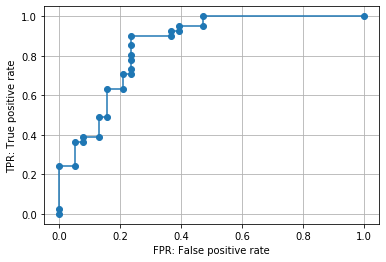

In [98]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
#plt.savefig('data/dst/sklearn_roc_curve.png')

In [99]:
true_p = 0
false_n = 0
total_posi_data = len(predict_positive_list)

false_p = 0
true_n = 0
total_nega_data = len(predict_negative_list)

for i in range(total_posi_data):
    if predict_positive_list[i][0] > predict_positive_list[i][1]:
        true_p = true_p + 1
    else:
        false_n = false_n + 1
        
for i in range(total_nega_data):
    if predict_negative_list[i][0] < predict_negative_list[i][1]:
        true_n = true_n + 1
    else:
        false_p = false_p + 1
    
sensitivity = true_p/total_posi_data
print(sensitivity)
specificity = true_n/total_nega_data

precision = true_p/(true_p+false_p)
accuracy = (true_p+true_n)/(total_posi_data+total_nega_data)

0.6341463414634146


In [100]:
print(true_p)
print(false_n)
print(false_p)
print(true_n)
print(true_p+false_n+false_p+true_n)

26
15
6
32
79


In [101]:
df_table02 = pd.DataFrame(
    data={'予測（開裂）': [true_p, false_p], 
          '予測（非開裂）': [false_n, true_n]},
    index=['実際（開裂）', '実際（非開裂）']
)
 
df_table02

,予測（開裂）,予測（非開裂）
実際（開裂）,26,15
実際（非開裂）,6,32


In [102]:
print(sensitivity)
print(specificity)
print(precision)
print(accuracy)

0.6341463414634146
0.8421052631578947
0.8125
0.7341772151898734


## FC various experiment

In [ ]:
#experiment number
Vernum = 94

In [88]:
#訓練データ
x_train = x_train_all
y_train = y_train_all

#検証データ
x_val = x_train_all_5crossval 
y_val = y_train_all_5crossval 

i=8 #Kernel width
j=10 #the number of Filters
k=0 #the number of hidden layers
m=32 #Batch size
n=100 #epochs


#old_session = KTF.get_session()
#session = tf.Session('')
#KTF.set_session(session)
#KTF.set_learning_phase(1)

#modelの定義の前に重みのリセットが必要で，これ？
tf.compat.v1.Session()
#sess = tf.compat.v1.Session()

#モデル構築
model = Sequential()
model.add(Conv2D(filters=j, kernel_size=(14, i), strides=(1, 1), padding='valid', 
                 data_format="channels_last", dilation_rate=(1, 1), activation='relu', 
                 use_bias=True, input_shape=(14, 8, 1), kernel_initializer='glorot_uniform', 
                 bias_initializer='zeros',  name='Dense_01'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None, 
#                       name='MaxPooling2D_01'))
model.add(Flatten(name='Flatten_01'))
#model.add(Dropout(0.50))
#model.add(Dense(units=k, name='Dense_02', activation='relu'))
#model.add(Dense(units=50, name='Dense_01', activation='relu')
#model.add(Dense(units=10, name='Denese_03', activation='relu'))
model.add(Dense(units=2, name='Dense_out'))
model.add(Activation('softmax'))

#モデルの構造を表示
model.summary()

#訓練（学習）プロセスの設定
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])



#バリデーションロスが減少した場合に，各エポック終了後，モデルの重みを保存します
#checkpointer = ModelCheckpoint(filepath='./weights.hdf5', verbose=0, save_best_only=True, save_format="h5")
### add for TensorBoard
erly_stpg = EarlyStopping(patience=10, verbose=1,monitor='val_loss' , mode = 'min') 
chkfile = './callbacks/' + '{0:2d}'.format(Vernum)+'_{epoch:02d}-{val_loss:.4f}.hdf5' #format関数
check_point = ModelCheckpoint(filepath = chkfile, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
check_point = [check_point]

log_dir = "log/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
cbks=[tensorboard_callback]

#訓練の実行 
NUM_BATCH=m
NUM_EPOCHS=n

#history = model.fit(x_train, y_train, batch_size=NUM_BATCH, epochs=NUM_EPOCHS, validation_split=0.2, shuffle = True ,
#                    callbacks=[erly_stpg , chck_pont], verbose = 0, )
history = model.fit(x_train, y_train, batch_size=NUM_BATCH, epochs=NUM_EPOCHS, 
                    shuffle = True, verbose = 0,
                    callbacks=check_point,
                   validation_data=(x_val, y_val))

print(type(history))
print(type(history.history))
print(history.history.keys())
print(history.history['loss'])
print(history.history['acc'])
print(history.history['val_loss'])
print(history.history['val_acc'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_01 (Conv2D)            (None, 1, 1, 10)          1130      
_________________________________________________________________
Flatten_01 (Flatten)         (None, 10)                0         
_________________________________________________________________
Dense_out (Dense)            (None, 2)                 22        
_________________________________________________________________
activation_9 (Activation)    (None, 2)                 0         
Total params: 1,152
Trainable params: 1,152
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.69352, saving model to ../callbacks/92_01-0.6935.hdf5

Epoch 00002: val_loss improved from 0.69352 to 0.69339, saving model to ../callbacks/92_02-0.6934.hdf5

Epoch 00003: val_loss improved from 0.69339 t


Epoch 00075: val_loss improved from 0.69189 to 0.69189, saving model to ../callbacks/92_75-0.6919.hdf5

Epoch 00076: val_loss improved from 0.69189 to 0.69189, saving model to ../callbacks/92_76-0.6919.hdf5

Epoch 00077: val_loss improved from 0.69189 to 0.69189, saving model to ../callbacks/92_77-0.6919.hdf5

Epoch 00078: val_loss did not improve from 0.69189

Epoch 00079: val_loss improved from 0.69189 to 0.69189, saving model to ../callbacks/92_79-0.6919.hdf5

Epoch 00080: val_loss did not improve from 0.69189

Epoch 00081: val_loss improved from 0.69189 to 0.69189, saving model to ../callbacks/92_81-0.6919.hdf5

Epoch 00082: val_loss improved from 0.69189 to 0.69189, saving model to ../callbacks/92_82-0.6919.hdf5

Epoch 00083: val_loss improved from 0.69189 to 0.69189, saving model to ../callbacks/92_83-0.6919.hdf5

Epoch 00084: val_loss improved from 0.69189 to 0.69189, saving model to ../callbacks/92_84-0.6919.hdf5

Epoch 00085: val_loss improved from 0.69189 to 0.69189, saving 

In [81]:
df1 = pd.DataFrame(
    data={'loss':history.history['loss'], 
          'acc':history.history['acc'],
          'val_loss':history.history['val_loss'], 
          'val_acc':history.history['val_acc']
         }, 
    index=np.arange(0, n)
)
 
df1

,loss,acc,val_loss,val_acc
0,30.274834,0.561514,0.692925,0.525641
1,0.693029,0.520505,0.692847,0.525641
2,0.692937,0.520505,0.692764,0.525641
3,0.692851,0.520505,0.692692,0.525641
4,0.692888,0.520505,0.692627,0.525641
...,...,...,...,...
95,0.692319,0.520505,0.691889,0.525641
96,0.692442,0.520505,0.691890,0.525641
97,0.692344,0.520505,0.691890,0.525641
98,0.692367,0.520505,0.691889,0.525641


In [82]:
df2 = pd.DataFrame(
    data={'Kernel':f'14x{i}',
         'Conv2D':str(j),
         'hidden01':str(k),
         'Batch_size':str(m),
         'epochs':str(n)}, 
    index=np.arange(4)
)
df2

,Kernel,Conv2D,hidden01,Batch_size,epochs
0,14x8,10,10,32,100
1,14x8,10,10,32,100
2,14x8,10,10,32,100
3,14x8,10,10,32,100


In [83]:
print(pd.concat([df1, df2], axis=1))
df3 = pd.concat([df1, df2], axis=1)

         loss       acc  val_loss   val_acc Kernel Conv2D hidden01 Batch_size  \
0   30.274834  0.561514  0.692925  0.525641   14x8     10       10         32   
1    0.693029  0.520505  0.692847  0.525641   14x8     10       10         32   
2    0.692937  0.520505  0.692764  0.525641   14x8     10       10         32   
3    0.692851  0.520505  0.692692  0.525641   14x8     10       10         32   
4    0.692888  0.520505  0.692627  0.525641    NaN    NaN      NaN        NaN   
..        ...       ...       ...       ...    ...    ...      ...        ...   
95   0.692319  0.520505  0.691889  0.525641    NaN    NaN      NaN        NaN   
96   0.692442  0.520505  0.691890  0.525641    NaN    NaN      NaN        NaN   
97   0.692344  0.520505  0.691890  0.525641    NaN    NaN      NaN        NaN   
98   0.692367  0.520505  0.691889  0.525641    NaN    NaN      NaN        NaN   
99   0.692404  0.520505  0.691889  0.525641    NaN    NaN      NaN        NaN   

   epochs  
0     100  
1  

In [84]:
var = "FC_various_03"
filename = f'./fitting_model/FCvsCNN/FC/trial_{var}.csv'
df3.to_csv(filename)

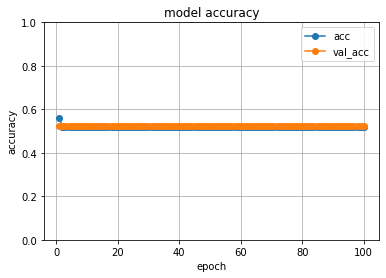

In [85]:
plt.plot(range(1, NUM_EPOCHS+1), df3['acc'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), df3['val_acc'], "-o")
plt.title('model accuracy')
plt.ylabel('accuracy')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

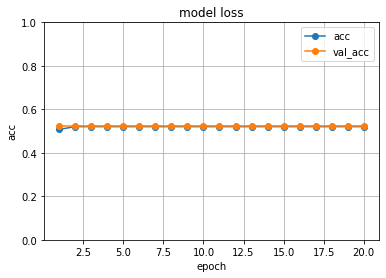

In [101]:
plt.plot(range(1, 20+1), df3.iloc[0:20, 1], "-o")
plt.plot(range(1, 20+1), df3.iloc[0:20, 3], "-o")
plt.title('model loss')
plt.ylabel('acc')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

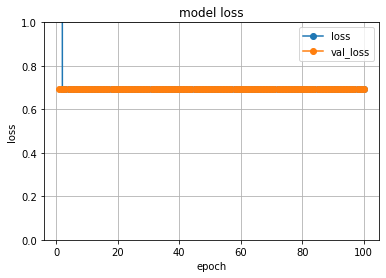

In [86]:
plt.plot(range(1, NUM_EPOCHS+1), df3['loss'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), df3['val_loss'], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

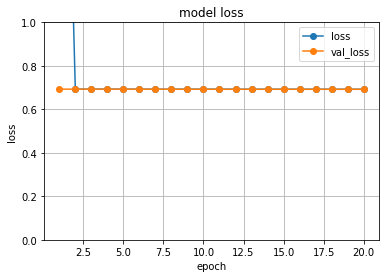

In [100]:
plt.plot(range(1, 20+1), df3.iloc[0:20, 0], "-o")
plt.plot(range(1, 20+1), df3.iloc[0:20, 2], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

In [79]:
loss, acc = model.evaluate(x_val, y_val)
print(f"Test Loss: {loss*100}%")
print(f"Test Acc: {acc*100}%")

78/78 [==============================] - 0s 108us/sample - loss: 0.6919 - acc: 0.5256
Test Loss: 69.1895740154462%
Test Acc: 52.56410241127014%


In [ ]:
#saving the model.
save_dir = "./saving_model/"
model_name = datetime.datetime.now().strftime(f"%Y%m%d-%H%M%S_{Vernum}")
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [ ]:
model = load_model("./saving_model/20220725-045012")